<a href="https://colab.research.google.com/github/Wintringham/EDA-Projects/blob/Fetal-health/Fetal_health_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование эмбрионального здоровья

Задачи:
1. Определить долю аномалий на основе репрезентативной выборки
2. Определить статистические показатели для выборки в целом и для разных групп здоровья
3. Определить факторы, имеющие наибольшее значение для установления группы здоровья
4. Определить наличие и силу линейной взаимосвязи между факторами

Этапы выполнения анализа:
1. Получение и оценка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Выводы

### 1. Получение и оценка данных

In [12]:
# импорт необходмых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp

In [11]:
from google.colab import files
uploaded = files.upload()

Saving fetal_health.csv to fetal_health (1).csv


In [13]:
# загрузка датасета
df = pd.read_csv('fetal_health.csv')


In [99]:
# получение общей информации о датасете
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1,2
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0,1
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0,1
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1,1
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1,1


In [100]:
df.shape

(2126, 22)

In [101]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [102]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [103]:
columns_list = list(df.columns)

In [104]:
# проверка на пропуски в данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [105]:
for cols in columns_list:
  if df[cols].isna().sum()>0:
    print (cols, df[cols].isna().sum())

Данные чистые, не содержат пропусков. Значения столбцов предположительно корректны.

In [106]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

Названия столбцов сложные для восприятия людьми, не имеющими профессионального образования в медицинской сфере. Тем не менее, для более корректного отображения данных исходные названия столбцов стоит сохранить, а для удобства использования - добавить варианты упрощенного русскоязычного перевода.

In [107]:
columns_list = list(df.columns)
columns_list_translated = list()
columns_list_translated = ['исходная частота сердечных сокращений плода',
                           'ускорения/перегрузки (кол-во в секунду)',\
                           'движения плода (кол-во в секунду)',\
                           'сокращения матки (кол-во в секунду)',\
                           'легкие замедления (кол-во в секунду)',\
                           'серьезные замедления (кол-во в секунду)',\
                           'продолжительные замедления (кол-во в секунду)',\
                           'аномальная кратковременная изменчивость (процент времени)',\
                           'среднее значение кратковременной изменчивости',\
                           'процент времени с аномальной продолжительной изменчивостью',\
                           'среднее значение продолжтиельной изменчивости',\
                           'ширина гистограммы',\
                           'минимальное значение гистограммы',\
                           'максимальное значение гистограммы',\
                           'количество пиков гистограммы',\
                           'количество нулей в гистограмме',\
                           'мода гистограммы',\
                           'среднее значение гистограммы',\
                           'медиана гистограммы',\
                           'дисперсия/амплитуда гистограммы',\
                           'тенденция/направление гистограммы',\
                           'здоровье эмбриона (1 - норма, 2 - подозрительно, 3 - патология)']

### 2. Предобработка данных

In [108]:
# изменение типов данных на более корректный
df = df.astype({'fetal_health':'int'})
df = df.astype({'histogram_tendency':'int'})

In [109]:
# оценка выбросов
for cols in columns_list:
    q1 = df[cols].quantile(0.01)
    q2 = df[cols].quantile(0.99)
    print(cols)
    print ('outliers', round((len(df[(df[cols] < q1) | (df[cols] > q2)][cols])/len(df[cols])*100), 3), '%')
    print()

baseline value
outliers 0.941 %

accelerations
outliers 0.659 %

fetal_movement
outliers 1.035 %

uterine_contractions
outliers 0.753 %

light_decelerations
outliers 0.847 %

severe_decelerations
outliers 0.329 %

prolongued_decelerations
outliers 0.564 %

abnormal_short_term_variability
outliers 1.599 %

mean_value_of_short_term_variability
outliers 0.988 %

percentage_of_time_with_abnormal_long_term_variability
outliers 1.035 %

mean_value_of_long_term_variability
outliers 0.988 %

histogram_width
outliers 1.787 %

histogram_min
outliers 0.941 %

histogram_max
outliers 1.787 %

histogram_number_of_peaks
outliers 0.894 %

histogram_number_of_zeroes
outliers 0.329 %

histogram_mode
outliers 2.023 %

histogram_mean
outliers 1.976 %

histogram_median
outliers 1.929 %

histogram_variance
outliers 1.035 %

histogram_tendency
outliers 0.0 %

fetal_health
outliers 0.0 %



In [110]:
# оценка выбросов
for cols in columns_list:
    q1 = df[cols].quantile(0.05)
    q2 = df[cols].quantile(0.95)
    print(cols)
    print ('outliers', round((len(df[(df[cols] < q1) | (df[cols] > q2)][cols])/len(df[cols])*100), 3), '%')
    print()

baseline value
outliers 9.172 %

accelerations
outliers 4.186 %

fetal_movement
outliers 4.986 %

uterine_contractions
outliers 3.81 %

light_decelerations
outliers 4.468 %

severe_decelerations
outliers 0.329 %

prolongued_decelerations
outliers 1.693 %

abnormal_short_term_variability
outliers 8.984 %

mean_value_of_short_term_variability
outliers 6.585 %

percentage_of_time_with_abnormal_long_term_variability
outliers 4.892 %

mean_value_of_long_term_variability
outliers 5.033 %

histogram_width
outliers 9.313 %

histogram_min
outliers 8.373 %

histogram_max
outliers 8.655 %

histogram_number_of_peaks
outliers 8.278 %

histogram_number_of_zeroes
outliers 1.317 %

histogram_mode
outliers 9.36 %

histogram_mean
outliers 9.313 %

histogram_median
outliers 9.548 %

histogram_variance
outliers 4.892 %

histogram_tendency
outliers 0.0 %

fetal_health
outliers 0.0 %



Выбросы более корректно брать по границам 00.1 и 0.99.

In [111]:
# оформление выбросов в отдельную переменную
df_outliers = pd.DataFrame()
for cols in columns_list:
    q1 = df[cols].quantile(0.01)
    q2 = df[cols].quantile(0.99)
    df_outliers=df_outliers._append(df[(df[cols] < q1) | (df[cols] > q2)], ignore_index=False)
df_outliers = df_outliers.drop_duplicates().copy()

In [112]:
df_outliers

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
125,159.0,0.000,0.000,0.003,0.000,0.0,0.000,65.0,0.4,16.0,...,81.0,172.0,0.0,0.0,163.0,163.0,165.0,2.0,1,2
126,159.0,0.000,0.000,0.004,0.000,0.0,0.000,69.0,0.3,21.0,...,153.0,168.0,0.0,0.0,163.0,163.0,164.0,0.0,1,2
127,159.0,0.000,0.000,0.003,0.000,0.0,0.000,62.0,0.5,6.0,...,81.0,172.0,0.0,0.0,163.0,163.0,164.0,2.0,1,2
128,159.0,0.000,0.000,0.003,0.000,0.0,0.000,65.0,0.4,11.0,...,153.0,168.0,0.0,0.0,163.0,162.0,164.0,0.0,1,2
133,159.0,0.001,0.000,0.008,0.000,0.0,0.000,61.0,0.4,8.0,...,133.0,177.0,4.0,0.0,165.0,164.0,166.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,120.0,0.000,0.000,0.001,0.007,0.0,0.002,64.0,1.1,0.0,...,74.0,154.0,3.0,0.0,86.0,99.0,99.0,40.0,-1,3
257,127.0,0.007,0.000,0.005,0.007,0.0,0.000,16.0,3.4,0.0,...,53.0,191.0,11.0,0.0,153.0,124.0,130.0,136.0,0,1
1750,134.0,0.005,0.002,0.002,0.003,0.0,0.003,62.0,1.5,0.0,...,71.0,184.0,4.0,0.0,89.0,113.0,110.0,148.0,-1,3
1751,134.0,0.004,0.001,0.001,0.004,0.0,0.003,60.0,1.6,0.0,...,71.0,184.0,7.0,0.0,89.0,118.0,113.0,195.0,-1,3


In [113]:
# оформление данных без выбросов в отдельную переменную
df_clean = df.copy()
outliers_index = list(df_outliers.index)
outliers_index.sort()
df_clean = df_clean.drop(labels=outliers_index, axis=0)

In [114]:
df_clean

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0,1
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0,1
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1,1
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1,1
12,131.0,0.005,0.072,0.008,0.003,0.0,0.0,28.0,1.4,0.0,...,88.0,154.0,5.0,0.0,135.0,134.0,137.0,7.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0,2
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1,2
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1,2
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1,2


### 3. Исследовательский анализ данных

1. Определение доли аномалий

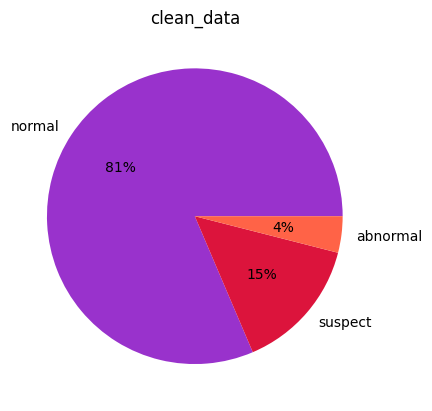

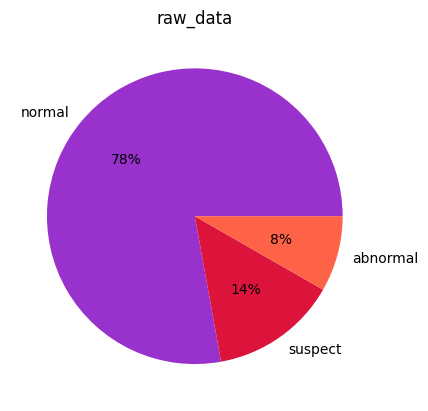

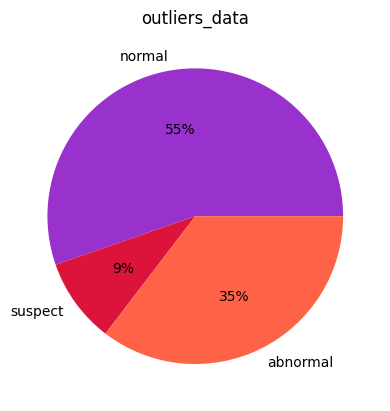

In [115]:
dfs = [df_clean, df, df_outliers]
df_names = ['clean_data', 'raw_data', 'outliers_data']

labels = ['normal', 'suspect', 'abnormal']
colors = ['darkorchid', 'crimson', 'tomato']
for d in range(3):
    plt.title(df_names[d])
    plt.pie(dfs[d].groupby('fetal_health')['fetal_health'].count(), labels=labels, colors=colors, autopct='%1.0f%%')
    plt.show()

Доля аномалий составляет:
- 4% для данных с исключенными выбросами;
- 8% для необработанных данных;
- 35% для выбросов.
Соотвественно, мы можем утверждать, что между 3-й группой здоровья и экстремальными (т.е. выходящими за границы 98% интервала) значениями факторов, присутствует определенная взаимосвязь.

2. Определение статистических показателей

In [116]:
for cols in columns_list:
    print(cols)
    print(df.groupby('fetal_health')[cols].agg(['count', 'mean', 'median', 'max', 'min']).T)
    print()

baseline value
fetal_health            1           2         3
count         1655.000000  295.000000  176.0000
mean           131.981873  141.684746  131.6875
median         132.000000  143.000000  132.0000
max            160.000000  159.000000  152.0000
min            106.000000  120.000000  110.0000

accelerations
fetal_health            1           2           3
count         1655.000000  295.000000  176.000000
mean             0.003992    0.000275    0.000392
median           0.003000    0.000000    0.000000
max              0.019000    0.005000    0.005000
min              0.000000    0.000000    0.000000

fetal_movement
fetal_health            1           2           3
count         1655.000000  295.000000  176.000000
mean             0.007963    0.008332    0.025676
median           0.000000    0.000000    0.001000
max              0.481000    0.430000    0.375000
min              0.000000    0.000000    0.000000

uterine_contractions
fetal_health            1          2        

Основываясь на показателях описательной статистики, можно заметить изменчивость по группам таких факторов, как:
- prolongued_decelerations ('продолжительные замедления');
- histogram_variance ('дисперсия/амплитуда гистограммы');
- histogram_tendency ('тенденция/направление гистограммы').

fetal_health
1    0.000051
2    0.000095
3    0.001273
Name: prolongued_decelerations, dtype: float64


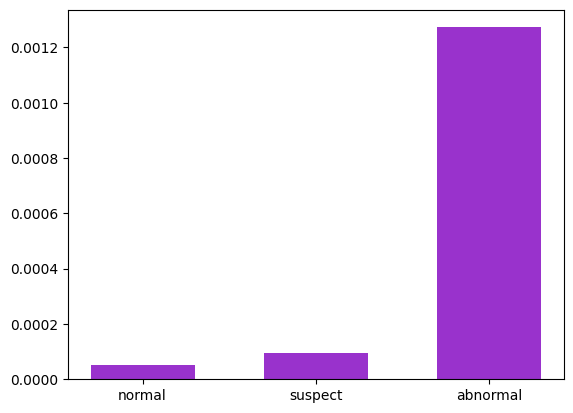

In [117]:
print(df.groupby('fetal_health')['prolongued_decelerations'].mean())

labels = ['normal', 'suspect', 'abnormal']
plt.bar(labels, df.groupby('fetal_health')['prolongued_decelerations'].mean(), width=0.6,  color = 'darkorchid')
plt.show()

fetal_health
1    0.000048
2    0.000063
3    0.001178
Name: prolongued_decelerations, dtype: float64


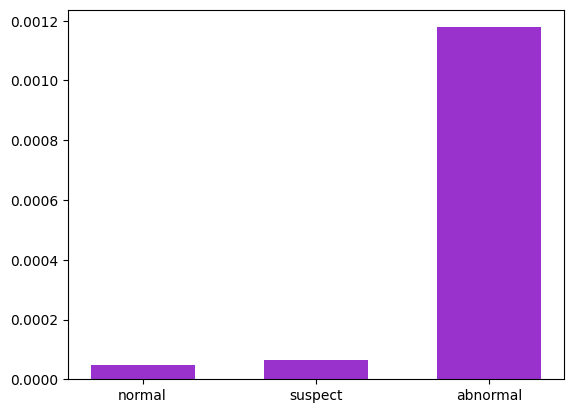

In [118]:
print(df_clean.groupby('fetal_health')['prolongued_decelerations'].mean())

labels = ['normal', 'suspect', 'abnormal']
plt.bar(labels, df_clean.groupby('fetal_health')['prolongued_decelerations'].mean(), width=0.6,  color = 'darkorchid')
plt.show()

Среднее значение фактора 'prolongued_decelerations' увелчивается от 1-2 групп к 3 группе приблизительно в 10 раз.

fetal_health
1    17.479758
2     7.213559
3    50.732955
Name: histogram_variance, dtype: float64


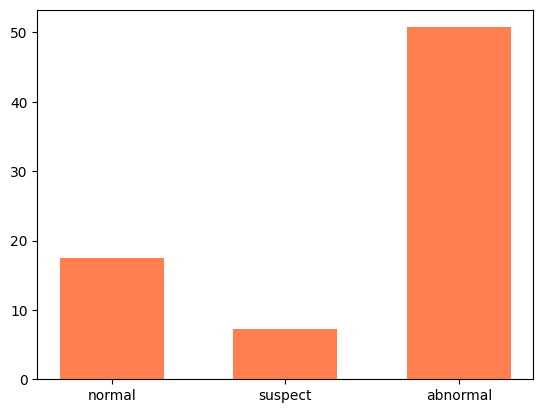

In [119]:
print(df.groupby('fetal_health')['histogram_variance'].mean())

plt.bar(labels, df.groupby('fetal_health')['histogram_variance'].mean(), width=0.6,  color = 'coral')
plt.show()

fetal_health
1    15.656627
2     5.074627
3    36.986301
Name: histogram_variance, dtype: float64


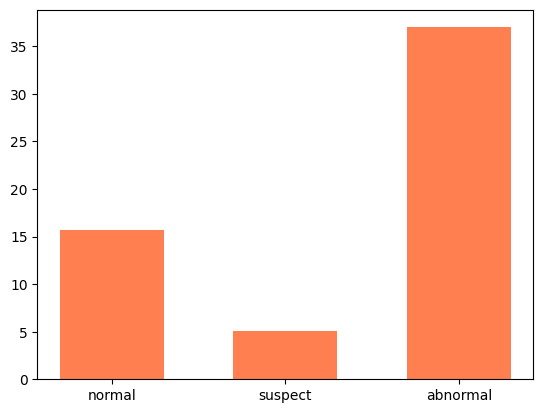

In [120]:
print(df_clean.groupby('fetal_health')['histogram_variance'].mean())

plt.bar(labels, df_clean.groupby('fetal_health')['histogram_variance'].mean(), width=0.6,  color = 'coral')
plt.show()

Для 3-й группы характерны более высокие средние значения фактора 'histogram_variance'.

fetal_health
1    0.341994
2    0.433898
3   -0.073864
Name: histogram_tendency, dtype: float64


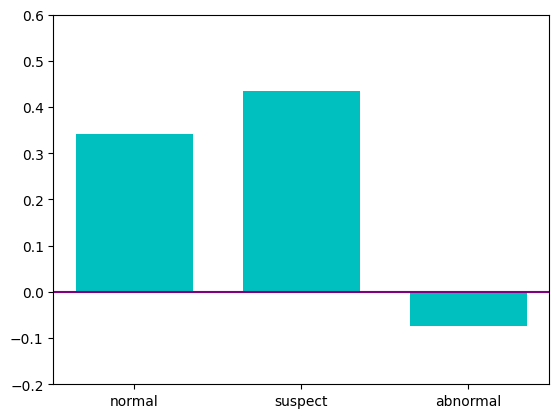

In [121]:
print(df.groupby('fetal_health')['histogram_tendency'].mean())

plt.ylim(-0.2, 0.6)
plt.bar(labels, df.groupby('fetal_health')['histogram_tendency'].mean(), width=0.7,  color = 'c')
plt.axhline(y=0, color = 'purple')
plt.show()

fetal_health
1    0.347390
2    0.429104
3    0.219178
Name: histogram_tendency, dtype: float64


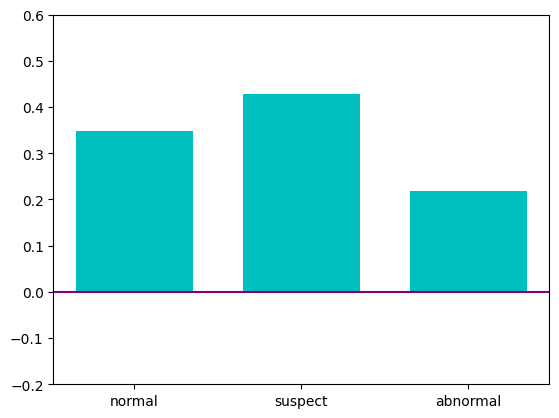

In [122]:
print(df_clean.groupby('fetal_health')['histogram_tendency'].mean())

plt.ylim(-0.2, 0.6)
plt.bar(labels, df_clean.groupby('fetal_health')['histogram_tendency'].mean(), width=0.7,  color = 'c')
plt.axhline(y=0, color = 'purple')
plt.show()

 Фактор 'histogram_tendency' демонстрирует более низкое среднее значение для 3-й группы (для датасета, *включающего в себя* выбросы - даже с отрицательной направленностью). Однако для датасета *с исключенными выбросами* средние значения данного фактора различатся незначительно. Значит, мы можем предположить, что общая направленность гистограммы более тесно (и скорее *отрицательно*) взаимосвязана с экстремальными значениями остальных факторов.

fetal_health
1    0.291925
2    0.481481
3   -0.281553
Name: histogram_tendency, dtype: float64


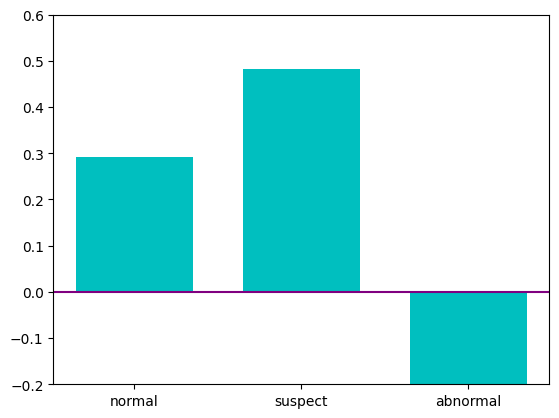

In [123]:
print(df_outliers.groupby('fetal_health')['histogram_tendency'].mean())

plt.ylim(-0.2, 0.6)
plt.bar(labels, df_outliers.groupby('fetal_health')['histogram_tendency'].mean(), width=0.7,  color = 'c')
plt.axhline(y=0, color = 'purple')
plt.show()

Ожидаемо, для датасета, содержащего исключительно выбросы, отрицательная направленность гистограммы еще более выражена. Возможно, что стоит отдельно проанализировать этот фактор на датасете выбросов.

In [124]:
# вычисление доли отрицательной направленности гистограммы для датасета выбросов
tendency_outliers = df_outliers.groupby('fetal_health', as_index=False)['histogram_tendency'].value_counts(normalize=True)

In [125]:
tendency_outliers_dict = dict()
for t in [-1, 0, 1]:
  inner_dict = dict()
  for i in range(3):
    inner_dict[labels[i]] = round(list(tendency_outliers[tendency_outliers.histogram_tendency == t]['proportion'])[i]*100)
  tendency_outliers_dict[t] = inner_dict

In [126]:
tendency_outliers_dict

{-1: {'normal': 10, 'suspect': 7, 'abnormal': 42},
 0: {'normal': 51, 'suspect': 37, 'abnormal': 45},
 1: {'normal': 39, 'suspect': 56, 'abnormal': 14}}

Анализ данных датасета выбросов показывает, что фактор общей тенденции гистограммы ('histogram_tendency') для 3-й (аномальной) группы здоровья, примерно в 40% имеет отрицательную направленность (при условии наличия хотя бы одного экстремального значения для наблюдения, т.е. выброса). Для 1-2 групп здоровья при идентичных вводных он не превышает 7-10%.

In [128]:
# вычисление доли отрицательной направленности гистограммы для датасета с включенными выбросами
tendency_df = df.groupby('fetal_health', as_index=False)['histogram_tendency'].value_counts(normalize=True)

In [129]:
tendency_df_dict = dict()
for t in [-1, 0, 1]:
  inner_dict = dict()
  for i in range(3):
    inner_dict[labels[i]] = round(list(tendency_df[tendency_df.histogram_tendency == t]['proportion'])[i]*100)
  tendency_df_dict[t] = inner_dict

In [130]:
tendency_df_dict

{-1: {'normal': 6, 'suspect': 5, 'abnormal': 28},
 0: {'normal': 54, 'suspect': 46, 'abnormal': 52},
 1: {'normal': 40, 'suspect': 48, 'abnormal': 20}}

Анализ данных датасета с включенными выбросами также показывает отрицательную направленность фактора ('histogram_tendency') для 3-й (аномальной) группы здоровья в 28% случаев, в то время как для 1 и 2 групп отрицательная направленность фактора встречается только в 5-6% случаев.

Таким образом, можно заключить, что наблюдение с отрицательной направленностью гистограммы в 30-40% случаев имеет риск присвоения 3-й группы здоровья.



In [131]:
# определение статистических показателей для датасета выбросов
for cols in columns_list:
    d = df_outliers.groupby('fetal_health')[cols].agg(['count', 'mean', 'median', 'max', 'min', 'std']).T
    print(cols)
    print(d)

baseline value
fetal_health           1           2           3
count         161.000000   27.000000  103.000000
mean          132.285714  147.000000  130.504854
median        132.000000  151.000000  130.000000
max           160.000000  159.000000  151.000000
min           106.000000  120.000000  110.000000
std            14.073658   12.118009    9.292495
accelerations
fetal_health           1          2           3
count         161.000000  27.000000  103.000000
mean            0.005478   0.000852    0.000621
median          0.004000   0.000000    0.000000
max             0.019000   0.005000    0.005000
min             0.000000   0.000000    0.000000
std             0.005365   0.001433    0.001253
fetal_movement
fetal_health           1          2           3
count         161.000000  27.000000  103.000000
mean            0.042776   0.047519    0.039359
median          0.000000   0.000000    0.001000
max             0.481000   0.430000    0.375000
min             0.000000   0.000000  

Основываясь на показателях описательной статистики, можно заметить, что для таких факторов, как:

- abnormal_short_term_variability (аномальная кратковременная изменчивость);
- percentage_of_time_with_abnormal_long_term_variability (процент времени с аномальной продолжительной изменчивостью),

характерно более высокое среднее значение для 3-й группы (по сравнению с 1-2 группами) при условии наличия хотя бы одного экстремального значения для наблюдения (т.е. выброса), а для такого фактора как:

- mean_value_of_long_term_variability (среднее значение продолжтиельной изменчивости),

характерно более низкое среднее значение для 3-й группы (по сравнению с 1-2 группами) при тех же условиях.



3. Определение факторов, влияющих на установление группы здоровья

In [132]:
# проверка на нормальность распределения
alpha = 0.05

In [133]:
# тест Шапиро-Уилка
for cols in columns_list:
    sh = scp.shapiro(df[cols])
    if sh[1]>=alpha:
        print(cols, sh)

In [134]:
# тест Смирнова-Колмогорова
for cols in columns_list:
    ks = scp.kstest(df[cols], 'norm')
    if ks[1]>=alpha:
        print(cols, ks)

In [135]:
# преобразование ненормального распределения путем логарифмирования
log_df = pd.DataFrame()
log_columns_list = []

In [151]:
for cols in columns_list:
    l = np.log(df[cols].apply(lambda x: x+2))
    sh = scp.shapiro(l)
    ks = scp.kstest(df[cols], 'norm')

    if sh[1]>=alpha and ks[1]>=alpha:
        log_columns_list.append(cols)
        log_df = pd.concat([log_df, l.to_frame()], axis = 1)

log_columns_list

[]

In [137]:
# преобразование не удалось, распределение не нормальное - следует использовать тест Манна-Уитни
df_1 = df_clean.query('fetal_health == 1')
df_2 = df_clean.query('fetal_health == 2')
df_3 = df_clean.query('fetal_health == 3')

mw_columns = []
mw_not_columns = []

In [138]:
# сравнение показателей 1 и 3 групп здоровья
# Н0 - показатели равны

for cols in columns_list[:-1]:
    mw = scp.mannwhitneyu(df_1[cols], df_3[cols], alternative='two-sided')
    if mw[1]<=alpha:
        mw_columns.append([cols, mw[1].round(5)])

    else:
        mw_not_columns.append([cols, mw[1].round(5)])

In [139]:
# статистически значимые различия для 1 и 3 групп обнаруживаются для следующих факторов:
mw_columns

[['accelerations', 0.0],
 ['light_decelerations', 9e-05],
 ['prolongued_decelerations', 0.0],
 ['abnormal_short_term_variability', 0.0],
 ['percentage_of_time_with_abnormal_long_term_variability', 0.04402],
 ['mean_value_of_long_term_variability', 0.0],
 ['histogram_min', 0.001],
 ['histogram_mode', 0.0],
 ['histogram_mean', 0.0],
 ['histogram_median', 0.0],
 ['histogram_variance', 0.00924]]

In [140]:
# обнаружить статистически значимую разницу не удалось
mw_not_columns

[['baseline value', 0.40523],
 ['fetal_movement', 0.23176],
 ['uterine_contractions', 0.11206],
 ['severe_decelerations', 1.0],
 ['mean_value_of_short_term_variability', 0.20594],
 ['histogram_width', 0.0675],
 ['histogram_max', 0.23516],
 ['histogram_number_of_peaks', 0.15322],
 ['histogram_number_of_zeroes', 0.97646],
 ['histogram_tendency', 0.06606]]

In [141]:
# сравнение показателей 1 и 2 групп здоровья
# Н0 - показатели равны

mw_columns2 = []
mw_not_columns2 = []

for cols in columns_list[:-1]:
    mw = scp.mannwhitneyu(df_1[cols], df_2[cols], alternative='two-sided')
    if mw[1]<=alpha:
        mw_columns2.append([cols, mw[1].round(5)])

    else:
        mw_not_columns2.append([cols, mw[1].round(5)])

In [142]:
# статистически значимые различия для 1 и 2 групп обнаруживаются для следующих факторов:
mw_columns2

[['baseline value', 0.0],
 ['accelerations', 0.0],
 ['fetal_movement', 0.0],
 ['uterine_contractions', 0.0],
 ['light_decelerations', 0.0],
 ['abnormal_short_term_variability', 0.0],
 ['mean_value_of_short_term_variability', 0.0],
 ['percentage_of_time_with_abnormal_long_term_variability', 0.0],
 ['histogram_width', 0.0],
 ['histogram_min', 0.0],
 ['histogram_max', 0.00832],
 ['histogram_number_of_peaks', 0.0],
 ['histogram_number_of_zeroes', 0.00129],
 ['histogram_mode', 0.0],
 ['histogram_mean', 0.0],
 ['histogram_median', 0.0],
 ['histogram_variance', 0.0],
 ['histogram_tendency', 0.02843]]

In [143]:
# обнаружить статистически значимую разницу не удалось
mw_not_columns2

[['severe_decelerations', 1.0],
 ['prolongued_decelerations', 0.68907],
 ['mean_value_of_long_term_variability', 0.12814]]

In [144]:
# сравнение показателей 2 и 3 групп здоровья
# Н0 - показатели равны

mw_columns3 = []
mw_not_columns3 = []

for cols in columns_list[:-1]:
    mw = scp.mannwhitneyu(df_2[cols], df_3[cols], alternative='two-sided')
    if mw[1]<=alpha:
        mw_columns3.append([cols, mw[1].round(5)])

    else:
        mw_not_columns3.append([cols, mw[1].round(5)])

In [145]:
# статистически значимые различия для 2 и 3 групп обнаруживаются для следующих факторов:
mw_columns3

[['baseline value', 0.0],
 ['uterine_contractions', 3e-05],
 ['light_decelerations', 0.0],
 ['prolongued_decelerations', 0.0],
 ['mean_value_of_short_term_variability', 0.0],
 ['percentage_of_time_with_abnormal_long_term_variability', 0.0],
 ['mean_value_of_long_term_variability', 0.0],
 ['histogram_width', 0.0],
 ['histogram_min', 0.0],
 ['histogram_number_of_peaks', 9e-05],
 ['histogram_mode', 0.0],
 ['histogram_mean', 0.0],
 ['histogram_median', 0.0],
 ['histogram_variance', 0.0],
 ['histogram_tendency', 0.00621]]

In [146]:
# обнаружить статистически значимую разницу не удалось
mw_not_columns3

[['accelerations', 0.08766],
 ['fetal_movement', 0.07098],
 ['severe_decelerations', 1.0],
 ['abnormal_short_term_variability', 0.60607],
 ['histogram_max', 0.97648],
 ['histogram_number_of_zeroes', 0.08408]]

Основываясь на результатах теста Манна-Уитни, можно заключить, что подавляющее большинство факторов имеет статистически значимую разницу в показателях и, соотвественно, оказывает значимое влияние на определение группы здоровья. Наименее значимыми факторами можно считать:
- 'severe_decelerations' (серьезные замедления);
- 'fetal_movement' (движение плода);
- 'histogram_number_of_zeroes' (количество нулей в гистограмме);
- 'histogram_max' (максимальное значение гистограммы),

т.к. по результатам 2/3 сравнений между их показателями не удалось обнаружить статистически значимую разницу.

4. Определение силы линейной взаимосвязи между факторами

In [147]:
# создание корреляционной матрицы
corr_matrix = df.corr()

<Axes: >

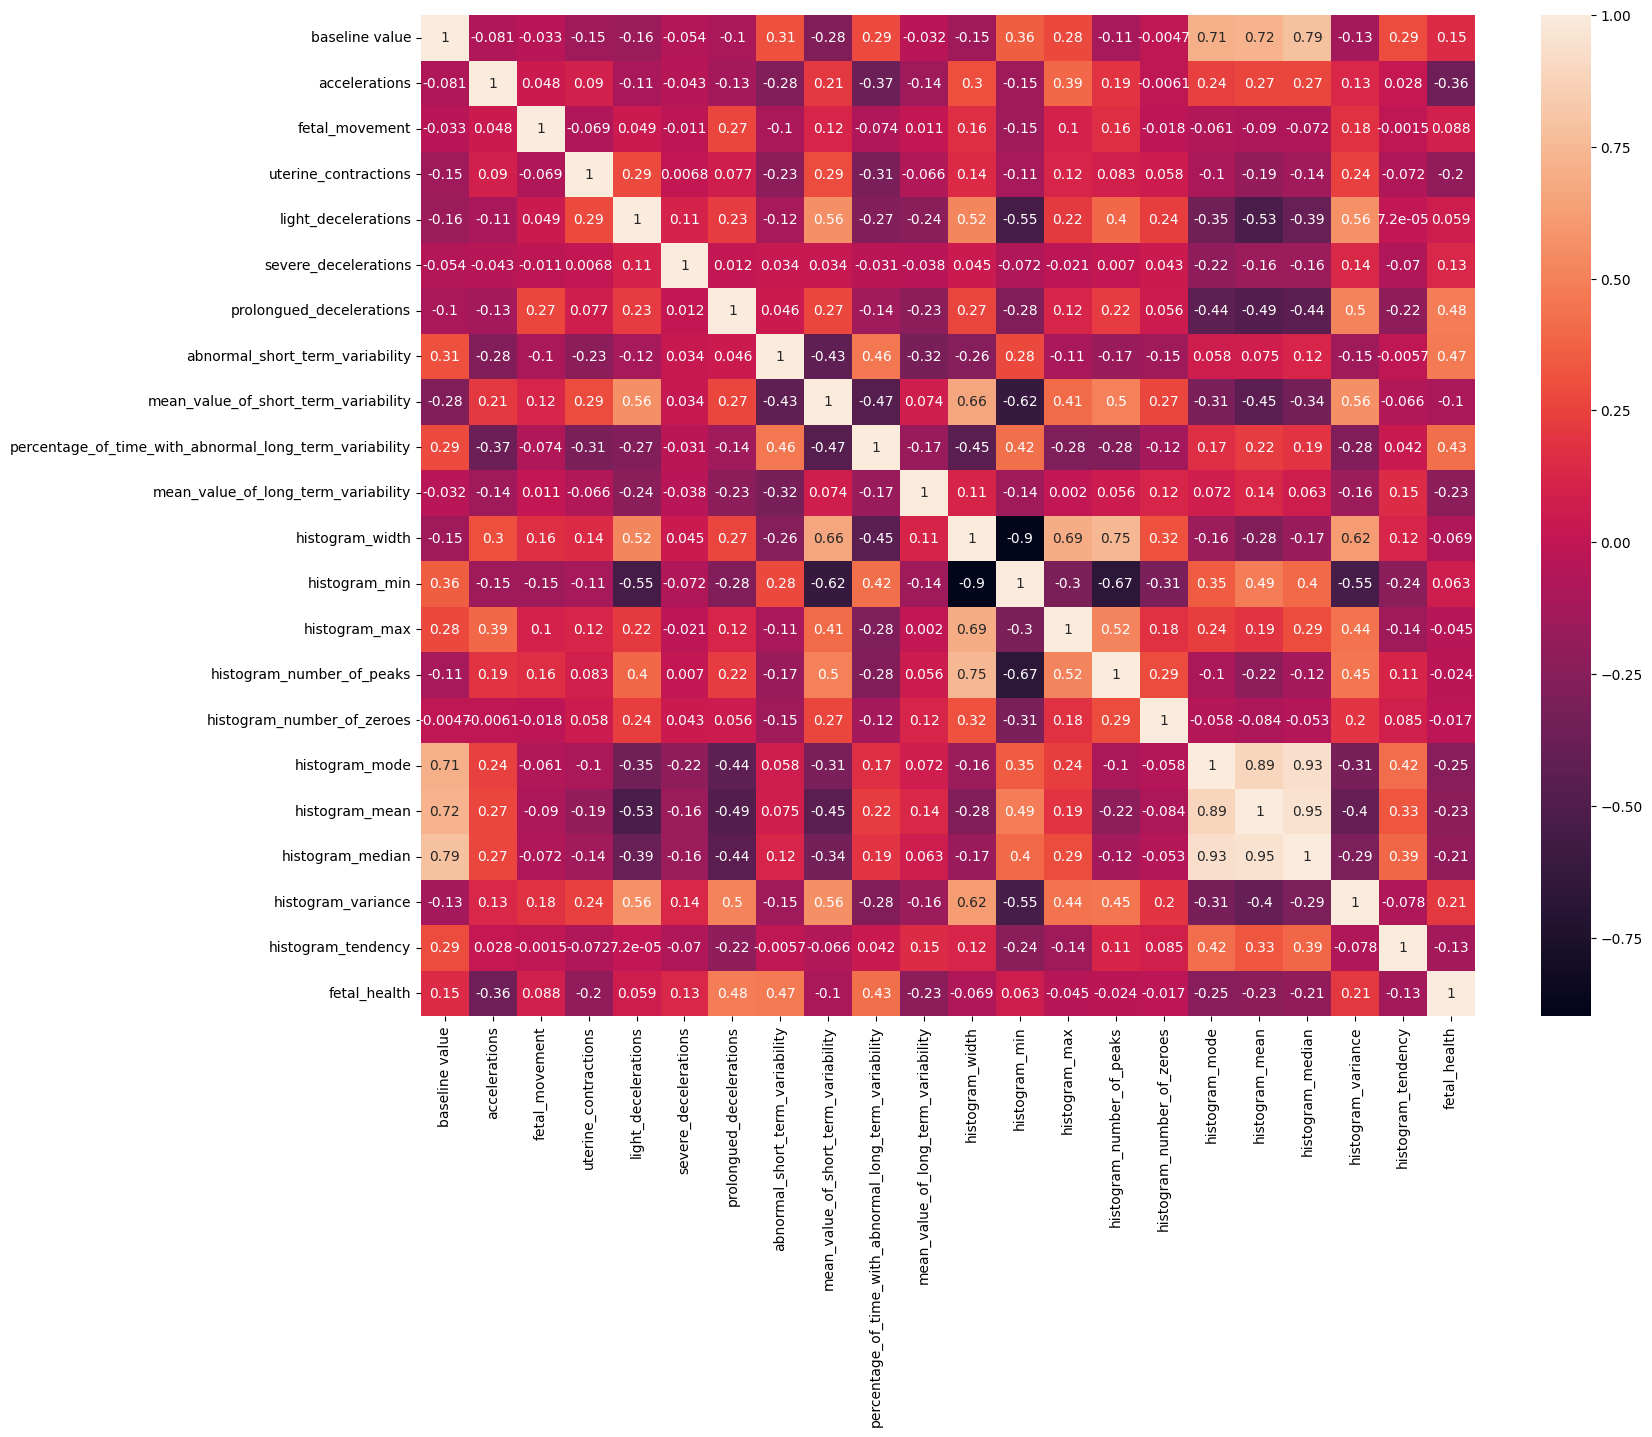

In [148]:
# создание тепловой карты корреляций
plt.figure(figsize=(17,13))
sns.heatmap(corr_matrix, annot=True)

In [149]:
# определение наиболее сильных корреляций
high_corr = []

for i in columns_list:
  for j in corr_matrix[i].index:
    if abs(corr_matrix[i][j])>0.6 and i!=j and abs(corr_matrix[i][j]) not in [i[-1] for i in high_corr]:
      high_corr.append([i, j, corr_matrix[i][j]])

In [150]:
high_corr

[['baseline value', 'histogram_mode', 0.7089925001119627],
 ['baseline value', 'histogram_mean', 0.7231210383374249],
 ['baseline value', 'histogram_median', 0.7892464071560361],
 ['mean_value_of_short_term_variability',
  'histogram_width',
  0.660846777385121],
 ['mean_value_of_short_term_variability',
  'histogram_min',
  -0.6225692461584522],
 ['histogram_width', 'histogram_min', -0.8985189643113362],
 ['histogram_width', 'histogram_max', 0.6907687901199792],
 ['histogram_width', 'histogram_number_of_peaks', 0.747070939952509],
 ['histogram_width', 'histogram_variance', 0.615883807027805],
 ['histogram_min',
  'mean_value_of_short_term_variability',
  -0.6225692461584522],
 ['histogram_min', 'histogram_width', -0.8985189643113362],
 ['histogram_min', 'histogram_number_of_peaks', -0.670286852429013],
 ['histogram_number_of_peaks', 'histogram_min', -0.670286852429013],
 ['histogram_mode', 'histogram_mean', 0.8934123838327097],
 ['histogram_mode', 'histogram_median', 0.933399156486651

Самая сильная линейная взаимосвязь прослеживается между однотипными показателями описательной статистики (мода, медиана, среднее значение гистограммы) и фактором исходной частоты сердечных сокращений;
также - между шириной гистограммы и ее атрибутами (максимальным, минимальным значением, изменчивостью и количеством пиков).
Отдельно стоит отметить среднее значение кратковременной изменчивости, коррелирующее с шириной гистограммы и ее минимальным значением.
Так или иначе, подавляющее большинство данных взаимосвязей объясняется спецификой гистограммы как инструмента измерения, а также тем, что часть факторов представляет собой результат базового анализа гистограммы с помощью описательной статистики для каждого наблюдения отдельно (мода, медиана, среднее значение, максимальное и минимальное значение, изменчивость, количество пиков, количество нулей, ширина).


### 4. Выводы

Основываясь на результатах исследовательского анализа данных, можно сделать следующие выводы:
1. **Подавляющее большинство** факторов оказывает значимое влияние на определение группы здоровья;
2. Показатели групп здоровья различаются также **статистически значимо**;
3. Есть определенные признаки, которые могут указывать на принадлежность к аномальной группе здоровья (особенно в совокупности!):
  - выбросы (экстремальные значения),
  - высокие и крайне высокие показатели факторов prolongued_decelerations и histogram_variance,   
  - отрицательная общая направленность гистограммы.

Возможно, повышенное внимание к данным признакам благоприятно повлияет на качество, точность и своевременность диагностики, а также будет полезно для дальнейших исследований эмбрионального здоровья.